In [1]:
import numpy as np
import os
from sklearn.metrics import confusion_matrix
import seaborn as sn; sn.set(font_scale=1.4)
from sklearn.utils import shuffle           
import matplotlib.pyplot as plt             
import cv2                                 
import tensorflow as tf                
from tqdm import tqdm


In [2]:
class_names = ['aircraft', 'tank', 'pistol']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

nb_classes = len(class_names)

IMAGE_SIZE = (150, 150)

In [3]:
def load_data():

    datasets = ['/content/drive/MyDrive/Colab_Notebooks/unzipped_data/data_2/train', '/content/drive/MyDrive/Colab_Notebooks/unzipped_data/data_2/test']
    output = []
    
    # Iterate through training and test sets
    for dataset in datasets:
        
        images = []
        labels = []
        
        print("Loading {}".format(dataset))
        
        # Iterate through each folder corresponding to a category
        for folder in os.listdir(dataset):
            label = class_names_label[folder]
            
            # Iterate through each image in our folder
            for file in tqdm(os.listdir(os.path.join(dataset, folder))):
                
                # Get the path name of the image
                img_path = os.path.join(os.path.join(dataset, folder), file)
                
                # Open and resize the img
                image = cv2.imread(img_path)
                #print(img_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, IMAGE_SIZE) 
                
                # Append the image and its corresponding label to the output
                images.append(image)
                labels.append(label)
                
        images = np.array(images, dtype = 'float32')
        labels = np.array(labels, dtype = 'int32')   
        
        output.append((images, labels))

    return output

In [4]:
(train_images, train_labels), (test_images, test_labels) = load_data()

  1%|          | 6/1000 [00:00<00:19, 50.74it/s]

Loading /content/drive/MyDrive/Colab_Notebooks/unzipped_data/data_2/train


  2%|▎         | 5/200 [00:00<00:04, 42.83it/s]

Loading /content/drive/MyDrive/Colab_Notebooks/unzipped_data/data_2/test


100%|██████████| 200/200 [00:08<00:00, 22.66it/s]


In [5]:
train_images, train_labels = shuffle(train_images, train_labels, random_state=25)

In [6]:
n_train = train_labels.shape[0]
n_test = test_labels.shape[0]

print ("Number of training examples: {}".format(n_train))
print ("Number of testing examples: {}".format(n_test))
print ("Each image is of size: {}".format(IMAGE_SIZE))

Number of training examples: 3000
Number of testing examples: 600
Each image is of size: (150, 150)


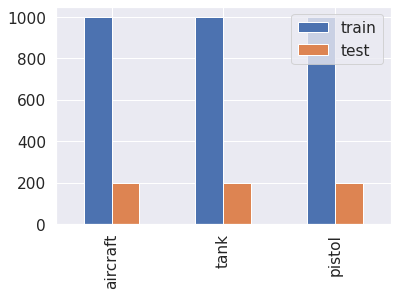

In [7]:
import pandas as pd

_, train_counts = np.unique(train_labels, return_counts=True)
_, test_counts = np.unique(test_labels, return_counts=True)
pd.DataFrame({'train': train_counts,
                    'test': test_counts}, 
             index=class_names
            ).plot.bar()
plt.show()

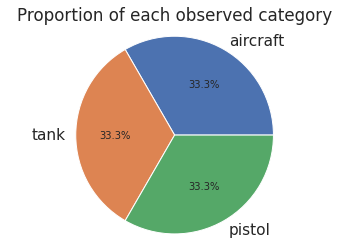

In [8]:
plt.pie(train_counts,
        explode=(0, 0, 0) , 
        labels=class_names,
        autopct='%1.1f%%')
plt.axis('equal')
plt.title('Proportion of each observed category')
plt.show()

In [9]:
train_images = train_images / 255.0 
test_images = test_images / 255.0

In [10]:
def display_random_image(class_names, images, labels):
    """
        Display a random image from the images array and its correspond label from the labels array.
    """
    
    index = np.random.randint(images.shape[0])
    plt.figure()
    plt.imshow(images[index])
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.title('Image #{} : '.format(index) + class_names[labels[index]])
    plt.show()

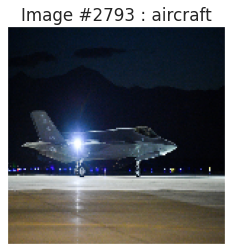

In [11]:
display_random_image(class_names, train_images, train_labels)

In [12]:
def display_examples(class_names, images, labels):
    """
        Display 25 images from the images array with its corresponding labels
    """
    
    fig = plt.figure(figsize=(10,10))
    fig.suptitle("Some examples of images of the dataset", fontsize=16)
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[labels[i]])
    plt.show()

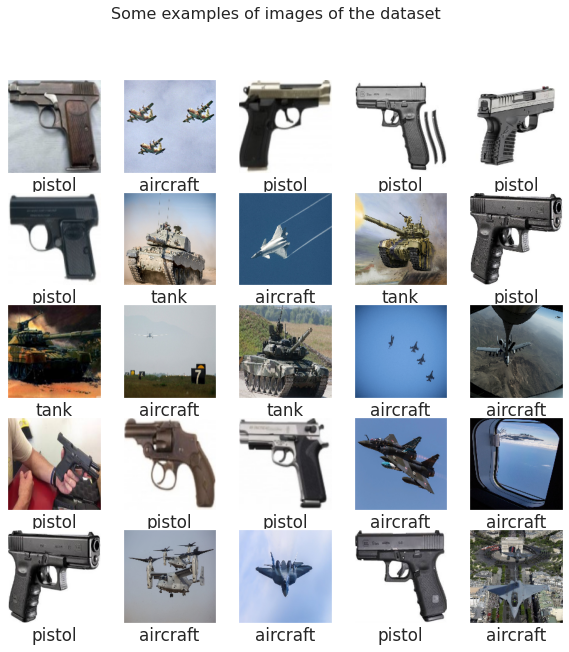

In [13]:
display_examples(class_names, train_images, train_labels)

In [14]:
import tensorflow.keras.layers as Layers
import tensorflow.keras.activations as Actications
import tensorflow.keras.models as Models
import tensorflow.keras.optimizers as Optimizer
import tensorflow.keras.metrics as Metrics
import tensorflow.keras.utils as Utils
from keras.utils.vis_utils import model_to_dot
import os
import matplotlib.pyplot as plot
import cv2
import numpy as np
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix as CM
from random import randint
from IPython.display import SVG
import matplotlib.gridspec as gridspec

In [15]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(3, activation=tf.nn.softmax)
])


In [16]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [17]:
hist_1 = model.fit(train_images, train_labels, batch_size=24, epochs=20, validation_split = 0.2)

Epoch 1/20
100/100 [==============================] - 4s 17ms/step - loss: 1.2374 - accuracy: 0.6264 - val_loss: 0.4103 - val_accuracy: 0.8433
Epoch 2/20
100/100 [==============================] - 1s 13ms/step - loss: 0.2838 - accuracy: 0.8915 - val_loss: 0.2770 - val_accuracy: 0.9050
Epoch 3/20
100/100 [==============================] - 1s 13ms/step - loss: 0.1499 - accuracy: 0.9459 - val_loss: 0.3042 - val_accuracy: 0.8917
Epoch 4/20
100/100 [==============================] - 1s 13ms/step - loss: 0.0852 - accuracy: 0.9727 - val_loss: 0.2701 - val_accuracy: 0.9017
Epoch 5/20
100/100 [==============================] - 1s 13ms/step - loss: 0.0373 - accuracy: 0.9901 - val_loss: 0.2775 - val_accuracy: 0.9167
Epoch 6/20
100/100 [==============================] - 1s 13ms/step - loss: 0.0160 - accuracy: 0.9972 - val_loss: 0.4353 - val_accuracy: 0.8633
Epoch 7/20
100/100 [==============================] - 1s 13ms/step - loss: 0.0183 - accuracy: 0.9985 - val_loss: 0.3538 - val_accuracy: 0.9033

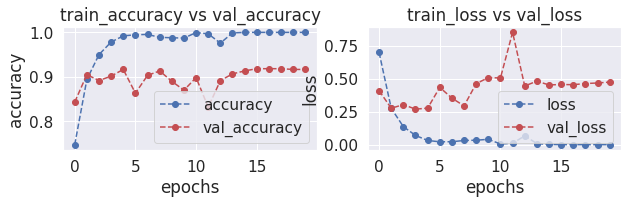

In [18]:
def plot_accuracy_loss(hist_1):

    fig = plt.figure(figsize=(10,5))

    # Plot accuracy
    plt.subplot(221)
    plt.plot(hist_1.history['accuracy'],'bo--', label = "accuracy")
    plt.plot(hist_1.history['val_accuracy'], 'ro--', label = "val_accuracy")
    plt.title("train_accuracy vs val_accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epochs")
    plt.legend()

    # Plot loss function
    plt.subplot(222)
    plt.plot(hist_1.history['loss'],'bo--', label = "loss")
    plt.plot(hist_1.history['val_loss'], 'ro--', label = "val_loss")
    plt.title("train_loss vs val_loss")
    plt.ylabel("loss")
    plt.xlabel("epochs")

    plt.legend()
    plt.show()

plot_accuracy_loss(hist_1)

In [19]:
import os
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.optimizers import RMSprop

local_weights_file = '/content/drive/MyDrive/Colab_Notebooks/yolov3/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'
pre_trained_model = InceptionV3(input_shape = (150, 150, 3), 
                                include_top = False, 
                                weights = None)

pre_trained_model.load_weights(local_weights_file)

for layer in pre_trained_model.layers:
     layer.trainable = False
        
pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 74, 74, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 74, 74, 32)   96          conv2d_2[0][0]                   
__________________________________________________________________________________________________
activation (Activation)         (None, 74, 74, 32)   0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [20]:
last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

x = layers.Flatten()(last_output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.2)(x)                  
x = layers.Dense(3, activation='softmax')(x)           

model = Model(pre_trained_model.input, x) 

model.compile(optimizer = RMSprop(lr=0.0001), 
              loss = 'sparse_categorical_crossentropy', 
              metrics = ['accuracy'])

hist_2=model.fit(train_images,train_labels,epochs=20,validation_data=(test_images,test_labels))

last layer output shape:  (None, 7, 7, 768)
Epoch 1/20
94/94 [==============================] - 8s 58ms/step - loss: 0.2699 - accuracy: 0.9088 - val_loss: 0.0845 - val_accuracy: 0.9733
Epoch 2/20
94/94 [==============================] - 5s 48ms/step - loss: 0.0047 - accuracy: 0.9987 - val_loss: 0.0309 - val_accuracy: 0.9900
Epoch 3/20
94/94 [==============================] - 4s 47ms/step - loss: 0.0015 - accuracy: 0.9997 - val_loss: 0.0473 - val_accuracy: 0.9900
Epoch 4/20
94/94 [==============================] - 4s 48ms/step - loss: 9.3193e-06 - accuracy: 1.0000 - val_loss: 0.0593 - val_accuracy: 0.9867
Epoch 5/20
94/94 [==============================] - 4s 48ms/step - loss: 9.6834e-04 - accuracy: 0.9994 - val_loss: 0.0472 - val_accuracy: 0.9883
Epoch 6/20
94/94 [==============================] - 4s 47ms/step - loss: 2.9994e-07 - accuracy: 1.0000 - val_loss: 0.0530 - val_accuracy: 0.9900
Epoch 7/20
94/94 [==============================] - 4s 47ms/step - loss: 1.8201e-06 - accuracy: 1.

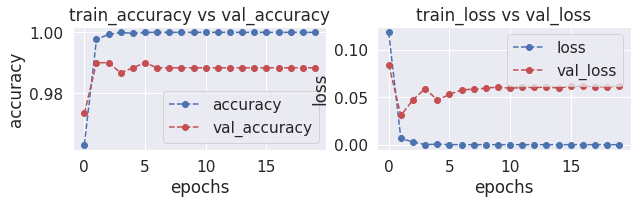

In [21]:
def plot_accuracy_loss(hist_2):
    """
        Plot the accuracy and the loss during the training of the nn.
    """
    fig = plt.figure(figsize=(10,5))

    # Plot accuracy
    plt.subplot(221)
    plt.plot(hist_2.history['accuracy'],'bo--', label = "accuracy")
    plt.plot(hist_2.history['val_accuracy'], 'ro--', label = "val_accuracy")
    plt.title("train_accuracy vs val_accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epochs")
    plt.legend()

    # Plot loss function
    plt.subplot(222)
    plt.plot(hist_2.history['loss'],'bo--', label = "loss")
    plt.plot(hist_2.history['val_loss'], 'ro--', label = "val_loss")
    plt.title("train_loss vs val_loss")
    plt.ylabel("loss")
    plt.xlabel("epochs")

    plt.legend()
    plt.show()

plot_accuracy_loss(hist_2)

In [26]:
from tensorflow.keras.applications import VGG16
file='/content/drive/MyDrive/Colab_Notebooks/yolov3/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'
pretrained_model=VGG16(input_shape = (150, 150, 3), 
                        include_top = False, 
                        weights =None)
pretrained_model.load_weights(file)

for layer in pretrained_model.layers:
     layer.trainable = False

last_layer = pretrained_model.get_layer('block5_pool')
print('last layer of vgg : output shape: ', last_layer.output_shape)
last_output = last_layer.output

x = layers.Flatten()(last_output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.2)(x)                  
x = layers.Dense(3, activation='softmax')(x)           

model_vgg = Model(pretrained_model.input, x) 


model_vgg.compile(optimizer = RMSprop(lr=0.0001), 
              loss = 'sparse_categorical_crossentropy', 
              metrics = ['accuracy'])

model_vgg.summary()

hist_3 = model_vgg.fit(train_images,train_labels,epochs=20,validation_data=(test_images,test_labels))

last layer of vgg : output shape:  (None, 4, 4, 512)
Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2

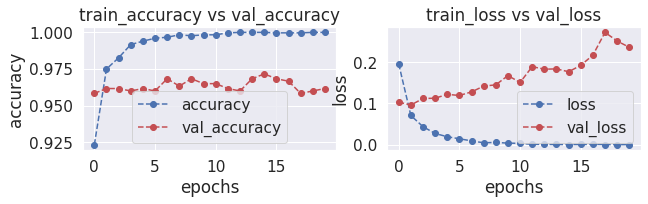

In [27]:
def plot_accuracy_loss(hist_3):
    """
        Plot the accuracy and the loss during the training of the nn.
    """
    fig = plt.figure(figsize=(10,5))

    # Plot accuracy
    plt.subplot(221)
    plt.plot(hist_3.history['accuracy'],'bo--', label = "accuracy")
    plt.plot(hist_3.history['val_accuracy'], 'ro--', label = "val_accuracy")
    plt.title("train_accuracy vs val_accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epochs")
    plt.legend()

    # Plot loss function
    plt.subplot(222)
    plt.plot(hist_3.history['loss'],'bo--', label = "loss")
    plt.plot(hist_3.history['val_loss'], 'ro--', label = "val_loss")
    plt.title("train_loss vs val_loss")
    plt.ylabel("loss")
    plt.xlabel("epochs")

    plt.legend()
    plt.show()

plot_accuracy_loss(hist_3)

In [28]:
from tensorflow.keras.applications import ResNet50

file_resnet='/content/drive/MyDrive/Colab_Notebooks/yolov3/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5'
pretrained_model=ResNet50( input_shape=(150,150,3),
                                  include_top=False,
                                  weights=None)

for layer in pretrained_model.layers:
     layer.trainable = False
       
last_layer = pretrained_model.get_layer('conv5_block3_out')
print('last layer of vgg : output shape: ', last_layer.output_shape)
last_output = last_layer.output

x = layers.Flatten()(last_output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.2)(x)                  
x = layers.Dense(3, activation='softmax')(x)


model_resnet = Model(pretrained_model.input, x) 

model_resnet.compile(optimizer = RMSprop(lr=0.0001), 
              loss = 'sparse_categorical_crossentropy', 
              metrics = ['accuracy'])

model_resnet.summary()

hist_4 = model_resnet.fit(train_images,train_labels,epochs=20,validation_data=(test_images,test_labels))

last layer of vgg : output shape:  (None, 5, 5, 2048)
Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 156, 156, 3)  0           input_5[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 75, 75, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 75, 75, 64)   256         conv1_conv[0][0]                 
______________________________________

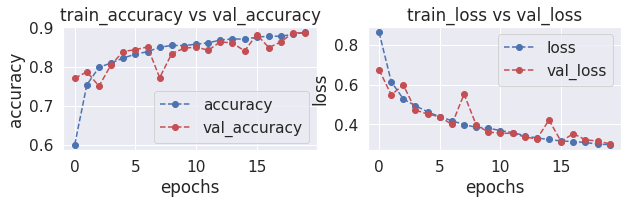

In [30]:
def plot_accuracy_loss(hist_4):
    """
        Plot the accuracy and the loss during the training of the nn.
    """
    fig = plt.figure(figsize=(10,5))

    # Plot accuracy
    plt.subplot(221)
    plt.plot(hist_4.history['accuracy'],'bo--', label = "accuracy")
    plt.plot(hist_4.history['val_accuracy'], 'ro--', label = "val_accuracy")
    plt.title("train_accuracy vs val_accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epochs")
    plt.legend()

    # Plot loss function
    plt.subplot(222)
    plt.plot(hist_4.history['loss'],'bo--', label = "loss")
    plt.plot(hist_4.history['val_loss'], 'ro--', label = "val_loss")
    plt.title("train_loss vs val_loss")
    plt.ylabel("loss")
    plt.xlabel("epochs")

    plt.legend()
    plt.show()

plot_accuracy_loss(hist_4)

In [59]:
def plot_history(hists, attribute='val_loss', axis=(-1,21,0.85,0.94), loc='lower right'):
    
    ylabel = {'oss': 'loss', 'accuracy': 'accuracy'}
    title = {'val_loss': 'valid. loss', 'loss': 'trn. loss', 'val_accuracy': 'valid. accuracy', 'accuracy': 'trn. accuracy'}
    num_hists = len(hists)
    
    plt.figure(figsize=(12, 8))  
    plt.axis(axis)
    for i in range(num_hists):
        plt.plot(hists[i].history['accuracy'])
    plt.title("Kıyaslama")  
    plt.ylabel(ylabel['accuracy'])  
    plt.xlabel('epoch')  
    plt.legend(['Own_model', 'inception', 'vgg16', 'resnet50'], loc=loc)  

    plt.show()

In [60]:
hists = [hist_1, hist_2, hist_3, hist_4]

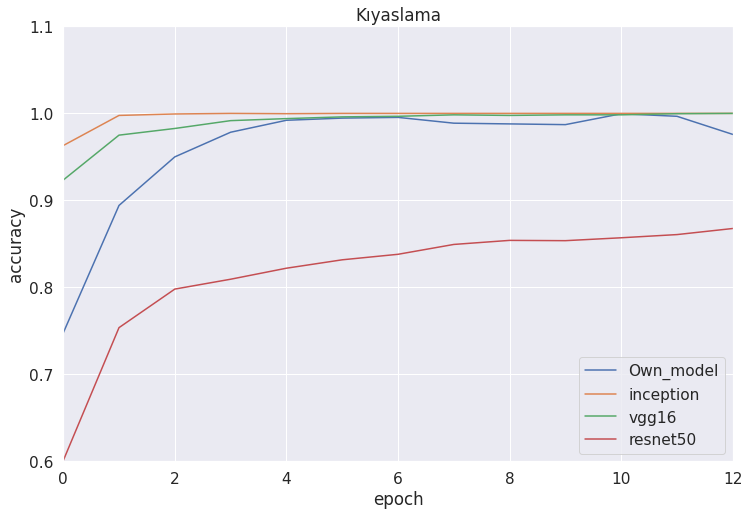

In [68]:
plot_history(hists, attribute='val_accuracy',axis=(0,12,0.6,1.1), loc='lower right')